# Coursera Capstone Project

## The Battle of Neighborhoods - Final 

### Upload Libraries Required

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


## Coursera Capstone Content

1. Introduction Section
1. Data Section
1. Methodology Section
1. Results Section
1. Discussion Section
1. Conclusion Section

# 1.	Introduction Section : 
### Discussion of the business problem and the audience who would be interested in this project.

### 1.1 Scenario and  Background

I am a knowledge individual presently residing in Downtown Singapore.
I presently live inside walking distance to Downtown "Telok Ayer MRT underground station" so I even have access to smart public transportation to figure. Likewise, I fancy several amenities within the neighborhood, like international preparation restaurants, cafes, food shops, and recreation.
I have been offered a good chance to figure in Manhattan, NY. though i'm terribly excited concerning it, i'm a small amount stress toward the method to secure a comparable place to measure in Manhattan. Therefore, call to use the learned skills throughout the Coursera course to explore ways that to form certain my decision is factual and appreciated.
Of course, there square measure alternatives to attain the solution exploitation on the market Google and Social media tools, however it appreciated doing it myself with learned tools.

### 1.2  Problem to be resolved:   

The challenge to resolve is having the ability to search out a rental lodging unit in Manhattan Empire State that provides similar characteristics and advantages to my current scenario. Therefore, so as to line a basis for comparison, i would like to search out a rental unit subject to the subsequent conditions:
- lodging with min a pair of bedrooms with monthly rent to not exceed US$7000/month
- Unit situated inside walking distance (<=1.0 mile, 1.6 km) from a subway railway line station in Manhattan
- the realm with amenities and venues like those delineated for current location ( See item a pair of.1)

### 1.3 Interested Audience:
I believe this can be a relevant project for someone or entity considering moving to a serious town in Europe, the United States or Asia since the approach and methodologies used here area unit applicable all told cases. the utilization of FourSquare information and mapping techniques combined with information analysis can facilitate resolve the key queries arisen. Lastly, this project could be a smart follow case toward the event of knowledge Science skills.


# 2. Data Section:
### Description of the data and its sources that will be used to solve the problem

### 2.1 Data of Current Situation

I presently reside within the neighborhood of 'Mccallum Street' in Downtown Singapore.
I use Foursquare to spot the venues round the space of residence that square measure then shown within the Singapore map shown in methodology and execution in section three.0. It is a reference for comparison with the required future location in Manhattan American state

### 2.2 Data Required to resolve the problem

In order to form a decent selection of an identical lodging in Manhattan New York State, the subsequent knowledge is required:
List/Information on neighborhoods from Manhattan with their Geodata ( latitude and meridian.
List/Information regarding the subway underground stations in Manhattan with geodata.
Listed residences for rent in Manhattan space with descriptions ( what percentage beds, price, location, address)
Venues and amenities within the Manhattan neighborhoods (e.g. top 10)
2.3 sources and manipulation
The list of Manhattan neighborhoods is discovered throughout the science laboratory exercise throughout the course. A CSV file was created which is able to be browse so as to make an information frame and its mapping. The CSV file 'mh_neigh_data.csv' has the subsequent organization. The file are going to be directly browse to the Jupiter Notebook for convenience and area savings. The cluster of neighborhoods and mapping are going to be shown, however. associate rule was accustomed confirm the geodata from Nominatim. the particular rule cryptography could also be shown in 'markdown' mode as a result of it takes time to run.

mh_neigh_data.tail():

                  Borough    Neighborhood       Latitude    Longitude

          35    Manhattan    Turtle Bay        40.752042    -73.967708

          36    Manhattan    Tudor City        40.746917    -73.971219

          37    Manhattan    Stuyvesant Town   40.731000    -73.974052
 
          38    Manhattan    Flatiron          40.739673    -73.990947

          39    Manhattan    Hudson Yards      40.756658    -74.000111
  
A list of Manhattan subway railway stops complied with Numbers (Apple excel) and it had been completed with Wikipedia information ( https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan) and data from New York Transit authority and Google maps (https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1) for a final consolidated list of subway stop names and their address. The geolocation was obtained via Associate in Nursing algorithmic rule exploitation Nominatim. Details are shown within the execution of the methodology in section three.0. The subway CSV file is ''MH_subway.csv'" and therefore the organization is: mhsub.tail():

               sub_station                    sub_address                         lat           long

      17    190 Street Subway Station    Bennett Ave, New York, NY 10040, USA    40.858113    -73.932983

      18    59 St-Lexington Av Station    E 60th St, New York, NY 10065, USA     40.762259    -73.966271

      19    57 Street Station           New York, NY 10019, United States        40.764250    -73.954525

      20    14 Street / 8 Av           New York, NY 10014, United Sta            40.730862    -73.987156

      21    MTA New York City        525 11th Ave, New York, NY 10018, USA       40.759809    -73.999282

A list of places for rent was collected by web-browsing real estate companies in Manhattan: 

http://www.rentmanhattan.com/index.cfm?page=search&state=results https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=list https://www.realtor.com/apartments/Manhattan_NY

A CSV file was compiled with the rental place that indicated: areas of Manhattan, address, number of beds, area and monthly rental price. The CSV file "nnnn.csv" had the following below structure. An algorithm was used to create all the geodata using Nominatim, as shown in section 3.0. The actual algorithm coding may be shown in 'markdown' mode because it takes time to run. With the use of geolocator = Nominatim(), it was possible to determine the latitude and longitude for the subway metro locations as well as for the geodata for each rental place listed. The loop algorithms used are shown in the execution of data in section 3.0

"Great_circle" function from geolocator was used to calculate distances between two points, as in the case to calculate average rent price for units around each subway station and at 1.6 km radius.
Foursquare is used to find the avenues at Manhattan neighborhoods in general and a cluster is created to later be able to search for the venues depending on the location shown.

### 2.4 How the data will be used to solve the problem

The data are going to be used as follows:

Use Foursquare and geopy information to map the highest ten venues for all Manhattan neighborhoods and clustered in teams ( as per Course LAB).

Use foursquare and geopy information to map the placement of subway subway stations, individually and on high of the above-clustered map so as to be able to determine the venues and amenities close to every subway station, or explore every subway location individually.

Use Foursquare and geopy information to map the placement of rental places, in some type, connected to the subway locations.

create a map that depicts, as an example, the typical rental value per sq. foot, around a radius of one.0 mile (1.6 km) around every depot - or similar metrics. {i will|i will be able to|i'll} be able to quickly purpose to the popups to understand the relative value per subway space.

Addresses from rental locations are going to be reborn to geodata( striated muscle, long) victimization Geopy-distance and Nominatim.

Data are going to be searched in open information sources if out there, from land sites if hospitable reading, libraries or alternative government agencies like subway ny MTA, etc.

### 2.5 Mapping of Data

The following maps were created to facilitate the analysis and therefore the selection of the palace to measure.
Manhattan map of Neighborhoods Manhattan subway subway locations, Manhattan map of places for rent.
Manhattan map of clustered venues and neighborhoods.
Combined maps of Manhattan rent places with subway locations
Combined maps of Manhattan rent places with subway locations and venues clusters


## 3. Methodology section:

This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps. 

### The analysis and the stragegy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of  location, price and feature, thus  making the selection very easy. 

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:
- what is the cost of available rental places that meet the demands?
- what is the cost of rent around a mile radius from each subway metro station?
- what is the area of Manhattan with best rental pricing that meets criteria established?
- What is the distance from work place ( Park Ave and 53 rd St) and the tentative future rental home?
- What are the venues of the two best places to live? How the prices compare?
- How venues distribute among Manhattan neighborhoods and around metro stations?
- Are there tradeoffs between size and price and location?
- Any other interesting statistical data findings of the real estate and overall data.

## Singapore Map - Current residence and venues in neighborhood
for comparison to future Manhattan renting place

In [2]:
# Shenton Way, District 01, Singapore
address = 'Mccallum Street, Singapore'
geolocator = Nominatim(user_agent='Singapore')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore home are 1.2784801, 103.8493717.


In [3]:
neighborhood_latitude=1.2784801
neighborhood_longitude=103.8493717

## Using FourSquare to find venues around current residence in Singapore

In [4]:
CLIENT_ID = 'Z4BOSJ31RZGXXBOQDGPIMLKIZFR4S5JWBZ1ZUVH3BUFAEXVI' # your Foursquare ID
CLIENT_SECRET = 'KEKZKFCO40E0KNU0MSATLYB1UAYWX4VV2Z1V0ESTAWNOQSNK' # your Foursquare Secret
VERSION = '20200528' # Foursquare API version

In [5]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=Z4BOSJ31RZGXXBOQDGPIMLKIZFR4S5JWBZ1ZUVH3BUFAEXVI&client_secret=KEKZKFCO40E0KNU0MSATLYB1UAYWX4VV2Z1V0ESTAWNOQSNK&v=20200528&ll=1.2784801,103.8493717&radius=500&limit=100'

In [6]:
results = requests.get(url).json()

#### Function that extracts the category of the venue - borrow from the Foursquare lab.

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = pd.json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(76, 4)

In [9]:
# Venues near current Singapore residence place
SGnearby_venues.head(10)

,name,categories,lat,lng
0,The Westin Singapore,Hotel,1.278275,103.850772
1,Pure Fitness,Gym,1.278631,103.851487
2,Lau Pa Sat Satay Street,Street Food Gathering,1.280261,103.850235
3,Anglo Indian Cafe & Bar,Indian Restaurant,1.279084,103.850127
4,Westin Infinity Pool,Pool,1.278057,103.851077
5,Napoleon Food & Wine Bar,Wine Bar,1.279925,103.847333
6,Sofitel So Singapore,Hotel,1.280017,103.849813
7,Lobby Lounge Westin,Bar,1.277811,103.850966
8,Mellower Coffee,Café,1.277814,103.848188
9,Cook & Brew,Gastropub,1.277842,103.851103


## Map of Singapore residence place with venues in Neighborhood - for reference

In [10]:
latitude=1.2792655
longitude=103.8480938
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

## Manhattan Neighborhoods, Data and Mapping

**Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.**

In [11]:
# Read csv file with clustered neighborhoods with geodata
manhattan_data  = pd.read_csv('mh_neigh_data.csv') 
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [12]:
manhattan_data.tail()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,Manhattan,Tudor City,40.746917,-73.971219,3
37,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,Manhattan,Flatiron,40.739673,-73.990947,3
39,Manhattan,Hudson Yards,40.756658,-74.000111,2


## Manhattan Borough neighborhoods - data with top 10 clustered venues

In [13]:
manhattan_merged = pd.read_csv('manhattan_merged.csv')
manhattan_merged.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


## Map of Manhattan neighborhoods with top 10 clustered venues

**popus   allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell**

In [14]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

## Examine a paticular Cluster - print venues

**After examining several cluster data , I concluded that cluster # 2 resembles closer the Singapore place, therefore providing guidance as to where to look for the future apartment .**
**Assign a value to 'kk' to explore a given cluster.**

In [15]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


## Map of Manhattan places for rent

**Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.**

**The initial data for 144 apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.**

In [16]:
mh_rent=pd.read_csv('MH_flats_price.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


In [17]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,NaN,NaN
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,NaN,NaN
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,NaN,NaN
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,NaN,NaN
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,NaN,NaN


## Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim

**Data  was stored in a csv file for simplifaction report purposes and saving code processing time in future.**

## This coding section was  'markedown' for the report because its execution takes few minutes . Terefore, the csv saved will be  be just read directly in the following cell.   

for n in range(len(mh_rent)):     
    address= mh_rent['Address'][n]  
    address=(mh_rent['Address'][n]+ '  , '+' Manhattan NY ')  
    geolocator = Nominatim(user_agent='Manhattan')  
    location = geolocator.geocode(address)  
    latitude = location.latitude  
    longitude = location.longitude  
    mh_rent['Lat'][n]=latitude  
    mh_rent['Long'][n]=longitude  
    time.sleep(2)  

print('Geodata completed')

## save dataframe to csv file

mh_rent.to_csv('MH_rent_latlong.csv',index=False)
mh_rent.shape

In [18]:
mh_rent=pd.read_csv('MH_rent_latlong.csv')
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [19]:
mh_rent.tail()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,200 East 72nd Street,Rental in Lenox Hill,5.15,3.0,1700,8750,40.769465,-73.960339
140,50 Murray Street,No fee rental in Tribeca,7.11,2.0,1223,8700,40.714051,-74.009608
141,300 East 56th Street,No fee rental in Midtown East,3.87,3.0,2100,8118,40.758216,-73.965190
142,1930 Broadway,No fee rental in Central Park West,5.06,2.0,1600,8095,40.772474,-73.981901
143,33 West 9th Street,Rental in Greenwich Village,6.67,2.0,1500,10000,40.733691,-73.997323


## Manhattan apartment rent price statistics

**A US 7000 Dollar per month rent is actually around the mean value - similar to Singapore! wow!**

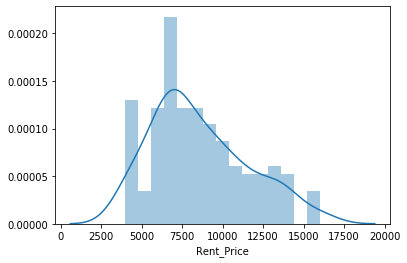

In [20]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=15)

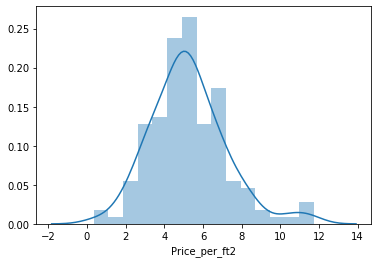

In [21]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=15)

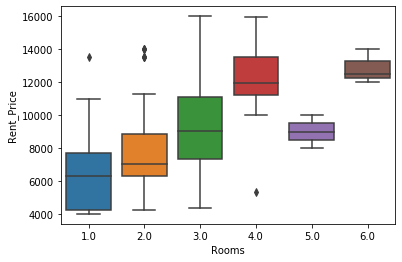

In [22]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

## Map of Manhattan apartments for rent 

**The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (Max US7000).**

In [23]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

## Map of Manhattan showing the places for rent and the cluster of venues 

**Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.**

**This is an insightful way to explore rental possibilites**

In [24]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

## Now one can explore a particular rental place and its venues in detail

**In the map above, examination of appartments with rental place below 7000/month is straightforwad while knowing the venues around it.**

**We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work.**

In [25]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


## Mapping Manhattan Subway locations

**Manhattan subway metro locations ( address) was obtained from webscrapping sites such as Wikipedia, Google and NY Metro Transit.  For simplification, a csv file was produced from the 'numbers' (Apple excel ) so that the reading of this file is the starting point here**

**The geodata will be obtain via Nominatim using the algorythm below.**

In [26]:
mh=pd.read_csv('NYC_subway_list.csv')
mh.head()

,sub_station,sub_address
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA"
1,57 Street Subway Station,"New York, NY 10106, USA"
2,Broad St,"New York, NY 10005, USA"
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA"
4,5 Av and 53 St,"New York, NY 10022, USA"


### Add colums labeled 'lat' and 'long' to be filled with geodata

In [27]:
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

## Algorythm to find latitude and longitud for each subway metro station and add them to dataframe.

**This coding has been 'Markdown' just to simplify the file report, and the csv file will be read in cell below.**

for n in range(len(mh)):  
    address= mh['sub_address'][n]  
    geolocator = Nominatim()  
    location = geolocator.geocode(address)  
    latitude = location.latitude  
    longitude = location.longitude  
    mh['lat'][n]=latitude  
    mh['long'][n]=longitude    
    time.sleep(2)  

print('Geodata completed')

**save dataframe to csv file**

mh.to_csv('MH_subway.csv',index=False)  
mh.shape

## Read csv file that produced the subway stations list with geodata

In [28]:
mh=pd.read_csv('MH_subway.csv')
print(mh.shape)
mh.head()

(76, 4)


,sub_station,sub_address,lat,long
0,Dyckman Street Subway Station,"170 Nagle Ave, New York, NY 10034, USA",40.861857,-73.924509
1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
3,175 Street Station,"807 W 177th St, New York, NY 10033, USA",40.847991,-73.939785
4,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525


In [29]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(22, 4)

In [30]:
mhsub1.tail()

,sub_station,sub_address,lat,long
17,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
18,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
19,57 Street Station,"New York, NY 10019, United States",40.764250,-73.954525
20,14 Street / 8 Av,"New York, NY 10014, United States",40.730862,-73.987156
21,MTA New York City,"525 11th Ave, New York, NY 10018, USA",40.759809,-73.999282


## MAP of Manhattan showing the location of subway stations

In [31]:
# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=40.7308619
longitude=-73.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

## Map of Manhattan showing places for rent and the subway locations nearby

**Now, we can visualize the desirable rental places and their nearest subway station. Popups display rental address and monthly rental price and the subway station name.**

**Notice that the icon in the top-right corner is a "ruler" that allows to measure the distance from a rental place to an specific subway station.**

In [32]:
mh_rent.head()

,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


In [33]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

# 4.0 Results

**ONE CONSOLIDATE MAP**

**Let's consolidate all the required inforamtion to make the apartment selection in one map**

## Map of Manhattan with rental places, subway locations and cluster of venues

**Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues**

In [34]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

## Problem Resolution - Select the apartment for rent

## The above consolidate map was used to explore options.  

**After examining, I have chosen two locations that meet the requirements which will assess to make a choice.**

**- Apartment 1: 
    305 East 63rd Street in the Sutton Place Neighborhood and near 'subway 59th Street' station, Cluster # 2
    Monthly rent : 7500 Dollars**
    
**- Apartment 2: 
    19 Dutch Street in the Financial District Neighborhood and near 'Fulton Street Subway' station, Cluster # 3
    Monthly rent : 6935 Dollars**
 

## Venues for Apartment 1 - Cluster 2

In [35]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Chinatown,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Central Harlem,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Yorkville,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Clinton,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Soho,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Morningside Heights,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Sutton Place,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Hudson Yards,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


## Venues for Apartment 2 - Cluster 3

In [37]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Inwood,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattanville,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Lenox Hill,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Upper West Side,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Murray Hill,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Gramercy,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Financial District,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Noho,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


## Apartment Selection

### Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.

**Apartment 1 rent cost is US7500 slightly above the US7000 budget. Apt 1 is located 400 meters from subway station at 59th Street and work place ( Park Ave and 53rd) is another 600 meters way. I can walk to work place and use subway for other places aroung. Venues for this apt are as of Cluster 2 and it is located in a fine district in the East side of Manhattan.**

**Apartment 2 rent cost is US6935, just under the US7000 budget. Apt 2 is located 60 meters from subway station at Fulton Street, but I will have to ride the subway daily to work , possibly 40-60 min ride. Venues for this apt are as of Cluster 3**

### Based on current Singapore venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that apartment 1 is a better choice since the extra monthly rent is worth the conveniences it provides.

## 5.0 DISCUSSION

**In general, I am positively impressed with the overall organization, content and lab works presented during the Coursera IBM Certification Course**

**I feel this Capstone project presented me a great opportunity to practice and apply the Data Science tools and methodologies learned.**

**I have created a good project that I can present as an example to show my potential.**

**I feel I have acquired a good starting point to become a professional Data Scientist and I will continue exploring to creating examples of practical cases.**

## 6.0 CONCLUSIONS

**I feel rewarded with the efforts, time and money spent. I believe this course with all the topics covered is well worthy of appreciation.**

**This project has shown me a practical application to resolve a real situation that has impacting personal and financial impact using Data Science tools.**

**The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision thoroughly and with confidence. I would recommend for use in similar situations.**

**One must keep abreast of new tools for DS that continue to appear for application in several business fields.**